In [1]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 24kB/s 
     |████████████████████████████████| 12.8MB 19.7MB/s 
     |████████████████████████████████| 7.6MB 6.1MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [2]:
!sudo apt install -y libsndfile1
!pip install numba==0.48
!pip install git+https://github.com/fastaudio/fastaudio.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-4ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  Cloning https://github.com/fastaudio/fastaudio.git to /tmp/pip-req-build-yu2ks6r2
  Running command git clone -q https://github.com/fastaudio/fastaudio.git /tmp/pip-req-build-yu2ks6r2
     |████████████████████████████████| 194kB 11.6MB/s 
     |████████████████████████████████| 184kB 17.9MB/s 
     |████████████████████████████████| 788kB 11.1MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 368kB 31.1MB/s 
  Created wheel for fastaudio: filename=fastaudio-0.1.4.post0.dev2+g8631a3f-py2.py3-none-any.whl size=18329 sha256=5013b79ce4941e35f33df68b7152e65146d0539ef4108dc1e9d581fa8af8c8f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-kj3cvpy7/wheels/20/af/b

In [4]:
!pip install timm
!pip install efficientnet_pytorch

     |████████████████████████████████| 245kB 13.5MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16032 sha256=3f3d0af424bd90f7ceb1260f9c87e306729851a2a3c088706bc3637a87e287a4
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


In [3]:
!git clone https://github.com/nestordemeure/ManifoldMixupV2.git

Cloning into 'ManifoldMixupV2'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 370 (delta 202), reused 347 (delta 181), pack-reused 0
Receiving objects: 100% (370/370), 651.94 KiB | 1.98 MiB/s, done.
Resolving deltas: 100% (202/202), done.


#Restart


In [3]:
%run /content/ManifoldMixupV2/manifold_mixup.py

In [ ]:
OutputMixup()

OutputMixup

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import torchaudio
torchaudio.set_audio_backend("sox_io")


/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [5]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append("..")

import librosa as lr
import librosa.display

import soundfile as sf
import io

from pathlib import Path
from tqdm.notebook import tqdm

from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastai.torch_basics import *
from fastai.torch_core import *
from fastai.basics import *
from fastai.data.all import *
from fastai.callback.all import *
from fastai.vision.all import *

import fastai
fastai.__version__

'2.1.8'

In [6]:
from google.colab import drive
drive.mount('/content/drive')# You must grant COLAB access to your Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
DATA_ROOT = Path("/content/drive/MyDrive/Colab Notebooks/RainForestAudio/data")
AUDIO_ROOT = Path(DATA_ROOT/"train/")
TRAIN_AUDIO_ROOT = Path(DATA_ROOT/"samples_long")
TEST_AUDIO_ROOT = Path(DATA_ROOT/"test")
VAL_AUDIO_ROOT = Path(DATA_ROOT/"val")
df_train = pd.DataFrame([path.stem for path in Path(TRAIN_AUDIO_ROOT).glob("*.flac")], columns=["recording_id"])
df_test = pd.DataFrame([path.stem for path in Path(TEST_AUDIO_ROOT).glob("*.flac")], columns=["recording_id"])
df = pd.read_csv(Path(DATA_ROOT/"train_tp.csv"))
print(df_train.shape, df_test.shape)
df

(1216, 1) (1992, 1)


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


# Define multi class model

In [8]:
def get_y_fn(x):
  y = str(x).split(".")[0].split('_')[-2]
  return y


cfg = AudioConfig.BasicMelSpectrogram(
        f_min=df["f_min"].min(),
        f_max=df["f_max"].max(),
        n_fft=2048,
        n_mels=224,
        hop_length=1004,
        normalized=True
   )



## Calculate mean and std

In [9]:
ch_std = torch.Tensor(np.load(Path(DATA_ROOT/"../channel_std.npy"),  allow_pickle=True))
ch_mean = torch.Tensor(np.load(Path(DATA_ROOT/"../channel_mean.npy"), allow_pickle=True))
#np.save(Path(DATA_ROOT/"../channel_std_big1.npy"), ch_std_big1.numpy(),  allow_pickle=True)
#np.save(Path(DATA_ROOT/"../channel_mean_big1.npy"), ch_mean_big1.numpy(),  allow_pickle=True)
ch_std_big1 = torch.Tensor(np.load(Path(DATA_ROOT/"../channel_std_big1.npy"),  allow_pickle=True))
ch_mean_big1 = torch.Tensor(np.load(Path(DATA_ROOT/"../channel_mean_big1.npy"), allow_pickle=True))

In [10]:
train_folds = np.load(Path(DATA_ROOT/"folds.npy"), allow_pickle=True)
valid_idx = train_folds[0]

## Define db and dls

In [11]:
#ChannelSpecNorm = SpecNormalize(ch_mean, ch_std, axes=(0))

item_tfms = [Resample(28000),ResizeSignal(8000, pad_mode=AudioPadType.Repeat), 
           #AddNoise(noise_level=0.3),
           ]
batch_tfms = [ AudioToSpec.from_cfg(cfg), 
              SGRoll(),
              MaskFreq(), MaskTime(), 
     #         Normalize(ch_mean, ch_std, axes=(0, 1, 3)),
              ]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 #get_x = ColReader("recording_id", pref=TRAIN_AUDIO_ROOT, suff=".flac"), 
                 get_items=get_audio_files,
                 item_tfms = item_tfms,
                 splitter = IndexSplitter(valid_idx),
                 #batch_tfms = [a2s],
                 #get_y = ColReader("species_id"), 
                 get_y=get_y_fn,
                 batch_tfms = batch_tfms
                                  )
print(auds.summary(TRAIN_AUDIO_ROOT))
dls = auds.dataloaders(TRAIN_AUDIO_ROOT, bs=8, verbose=True, before_batch = batch_tfms, 
                       num_workers=4
                       #, shuffle=True
                      )


Setting-up type transforms pipelines


/usr/local/lib/python3.6/dist-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (224) may be set too high. Or, the value for `n_freqs` (1025) may be set too low.
  "At least one mel filterbank has all zero values. "


Found 1216 items
2 datasets of sizes 976,240
Setting up Pipeline: partial
Setting up Pipeline: get_y_fn -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: partial
    starting from
      /content/drive/MyDrive/Colab Notebooks/RainForestAudio/data/samples_long/39c15e092_10_284.flac
    applying partial gives
      AudioTensor of size 1x252000
  Pipeline: get_y_fn -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/drive/MyDrive/Colab Notebooks/RainForestAudio/data/samples_long/39c15e092_10_284.flac
    applying get_y_fn gives
      10
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (AudioTensor([[-0.0052, -0.0014,  0.0032,  ...,  0.0098,  0.0063,  0.0033]]), TensorCategory(2))


Found 1216 items
2 datasets of sizes 976,240
Setting up Pipeline: partial
Setting up Pipeline: get_y_fn -> Categorize -- {'vocab': None, 'sort': True, 

/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/usr/local/lib/python3.6/dist-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


In [12]:
def _one_sample_positive_class_precisions(scores, truth):
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)

    if not len(pos_class_indices):
        return pos_class_indices, np.zeros(0)

    retrieved_classes = np.argsort(scores)[::-1]

    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)

    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True

    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)

    precision_at_hits = (
            retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
            (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits

def lwlrap(scores, truth):
    #print(truth.shape, scores.shape)
    num_samples, num_classes = scores.shape
    scores = scores.cpu().numpy()
    gt = np.zeros((num_samples, num_classes))
    for n, i in enumerate(truth.cpu().numpy().astype(int)):
      gt[n, i] = 1
    assert gt.shape == scores.shape
    
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = _one_sample_positive_class_precisions(scores[sample_num, :], gt[sample_num, :])
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = precision_at_hits

    labels_per_class = np.sum(gt > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))

    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    #return per_class_lwlrap, weight_per_class
    return (per_class_lwlrap * weight_per_class).sum()


In [13]:
from efficientnet_pytorch import EfficientNet
import timm
from timm import create_model
# from https://colab.research.google.com/github/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Computer%20Vision/05_EfficientNet_and_Custom_Weights.ipynb#scrollTo=VXPjDVUlJgCU

In [14]:
timm.__version__

'0.3.4'

In [15]:
#from fastai.vision https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py
# Cell
def _update_first_layer(model, n_in, pretrained):
    "Change first layer based on number of input channels"
    if n_in == 3: return
    first_layer, parent, name = _get_first_layer(model)
    assert isinstance(first_layer, nn.Conv2d), f'Change of input channels only supported with Conv2d, found {first_layer.__class__.__name__}'
    assert getattr(first_layer, 'in_channels') == 3, f'Unexpected number of input channels, found {getattr(first_layer, "in_channels")} while expecting 3'
    params = {attr:getattr(first_layer, attr) for attr in 'out_channels kernel_size stride padding dilation groups padding_mode'.split()}
    params['bias'] = getattr(first_layer, 'bias') is not None
    params['in_channels'] = n_in
    new_layer = nn.Conv2d(**params)
    if pretrained:
        _load_pretrained_weights(new_layer, first_layer)
    setattr(parent, name, new_layer)

    # Cell
def _get_first_layer(m):
    "Access first layer of a model"
    c,p,n = m,None,None  # child, parent, name
    for n in next(m.named_parameters())[0].split('.')[:-1]:
        p,c=c,getattr(c,n)
    return c,p,n



In [16]:
def init_layer(layer):
    nn.init.xavier_uniform_(layer.weight)

    if hasattr(layer, "bias"):
        if layer.bias is not None:
            layer.bias.data.fill_(0.)


def init_bn(bn):
    bn.bias.data.fill_(0.)
    bn.weight.data.fill_(1.0)

class AttBlock(nn.Module):
    def __init__(self,
                 in_features: int,
                 out_features: int,
                 activation="linear",
                 temperature=1.0):
        super().__init__()

        self.activation = activation
        self.temperature = temperature
        self.att = nn.Conv1d(
            in_channels=in_features,
            out_channels=out_features,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=True)
        self.cla = nn.Conv1d(
            in_channels=in_features,
            out_channels=out_features,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=True)

        self.bn_att = nn.BatchNorm1d(out_features)
        self.init_weights()

    def init_weights(self):
        init_layer(self.att)
        init_layer(self.cla)
        init_bn(self.bn_att)

    def forward(self, x):
        # x: (n_samples, n_in, n_time)
        norm_att = torch.softmax(torch.tanh(self.att(x)), dim=-1)
        cla = self.nonlinear_transform(self.cla(x))
        x = torch.sum(norm_att * cla, dim=2)
        return x, norm_att, cla

    def nonlinear_transform(self, x):
        if self.activation == 'linear':
            return x
        elif self.activation == 'sigmoid':
            return torch.sigmoid(x)



In [21]:
class PANNsDense201Att_local(nn.Module):
    def __init__(self, classes_num: int):
        super().__init__()

        #self.fc1 = nn.Linear(1920, 1024, bias=True)
        self.fc1 = nn.Linear(1536, 24, bias=True)
        #self.att_block = AttBlock(1024, classes_num, activation='sigmoid')

        self.init_weight()

    def init_weight(self):
        #init_bn(self.bn0)
        init_layer(self.fc1)
        
      

    def forward(self, input_data):
          x = input_data
        
          # Aggregate in frequency axis
     #     x = torch.mean(x, dim=3)

          x1 = F.max_pool1d(x, kernel_size=3, stride=1, padding=1)
          x2 = F.avg_pool1d(x, kernel_size=3, stride=1, padding=1)
          x = x1 + x2

      #    x = F.dropout(x, p=0.5, training=self.training)
      #    x = x.transpose(1, 2)
          x = F.relu_(self.fc1(x))
      #    x = x.transpose(1, 2)
      #    x = F.dropout(x, p=0.5, training=self.training)

      #    (clipwise_output, norm_att, segmentwise_output) = self.att_block(x)
      #    return clipwise_output
          return x

EPSILON_FP16 = 1e-5
class PANNsLoss(nn.Module):
    def __init__(self):
        super().__init__()

        self.bce = nn.BCEWithLogitsLoss()

    def forward(self, input, target):
        input_ = input
        # input_ = torch.where(torch.isnan(input_),
        #                      torch.zeros_like(input_),
        #                      input_)
        # input_ = torch.where(torch.isinf(input_),
        #                      torch.zeros_like(input_),
        #                      input_)
        
        # input_ = torch.argmax(torch.sigmoid(input_).float(), axis=1).float()
        input_ = torch.sigmoid(input_)
        input_ = torch.clamp(input_, min=EPSILON_FP16, max=1.0-EPSILON_FP16)
        #target = torch.tensor(target.float(), requires_grad=True)
        targte=target.float()
        print(input_, target)
        loss = self.bce(torch.argmax(input_, axis=1).float(), target)
        print(loss)
        return loss

In [22]:
from timm.models.layers import *
def create_timm_body(arch:str, pretrained=True, cut=None, n_in=1):
    "Creates a body from any model in the `timm` library."
    model = create_model(arch, pretrained=pretrained, num_classes=0, in_chans=1)
    #_update_first_layer(model, n_in, pretrained)
    if cut is None:
        ll = list(enumerate(model.children()))
        #cut = next(i for i,o in reversed(ll) if has_pool_type(o))
        return model
    if isinstance(cut, int): return nn.Sequential(*list(model.children())[:cut])
    elif callable(cut): return cut(model)
    else: raise NamedError("cut must be either integer or function")

body = create_timm_body('efficientnet_b3', pretrained=True, cut=-2)
print(body)
head = PANNsDense201Att_local(24)
#head = create_head(768, dls.c)
# head=nn.Sequential(
      
#       SelectAdaptivePool2d(pool_type="avgmax", flatten=True),
#       nn.Dropout(p=0.5,inplace=True),
#       #Transpose(1,3),
#       #nn.Linear(in_features=384, out_features=384, bias=False),
#       #nn.ReLU(inplace=True),
#       Transpose(0,1),
#       #nn.Dropout(p=0.5,inplace=True),
#       AttBlock(384, 24, activation='sigmoid'),
#       FilterTuple()
# )
model = nn.Sequential(body, head)
apply_init(model[1], nn.init.xavier_normal_)
len(model), head

Sequential(
  (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SiLU(inplace=True)
  (3): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
      (1): DepthwiseSeparableConv(
      

(2,
 PANNsDense201Att_local(
   (fc1): Linear(in_features=1536, out_features=24, bias=True)
 ))

In [23]:
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
learn = Learner(dls, model, splitter=default_split,  
              #  loss_func=PANNsLoss()
                )
learn.freeze()
frozen_params = filter(lambda p: not p.requires_grad, learn.model.parameters())
frozen_params = sum([np.prod(p.size()) for p in frozen_params])
unfrozen_params = filter(lambda p: p.requires_grad, learn.model.parameters())
unfrozen_params = sum([np.prod(p.size()) for p in unfrozen_params])
unfrozen_params, frozen_params, len(list(learn.model.parameters())), learn.loss_func

(124184, 10608216, 340, FlattenedLoss of CrossEntropyLoss())

##Train

In [24]:
learn.lr_find()

RuntimeError: ignored

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b3')
model

In [ ]:
EXP_NAME = "eff+att"
learn = Learner(dls, 
            model,
           # n_in=1, #<- Only audio specific modification here
        #    loss_func=LabelSmoothingCrossEntropyFlat(),
          #  cbs = OutputMixup(alpha=0.4),
            metrics=[accuracy, lwlrap],
         #   train_bn=False
         #loss_func = PANNsLoss()
         )
learn.to_fp16()
learn.loss_func


In [ ]:
dls.show_batch()

In [ ]:
SUFFIX ="step1"
#learn.fit_one_cycle(6, 1e-3)
learn.freeze()
learn.fit(1, 1e-3)
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, wd=1e-2, div=10, pct_start=0.3,
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}') ]
)
                    
#learn.fit_one_cycle(5,  1e-3/5, wd=1e-2, div=10, pct_start=0.3)
#learn.fit_one_cycle(30, 1e-3/8, wd=1e-2, div=10, pct_start=0.3)

In [ ]:
a = torch.tensor([[4.9472e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 4.4595e-01, 1.0000e-05,
         1.0000e-05, 9.9998e-01, 1.0000e-05, 2.4798e-02, 1.0000e-05, 9.9645e-01,
         1.0000e-05, 9.9946e-01, 1.0000e-05, 2.9951e-01, 1.7131e-04, 9.9996e-01,
         1.0000e-05, 9.9999e-01, 9.1641e-01, 9.9999e-01, 1.0000e-05, 1.0000e-05],
        [1.0000e-05, 3.6358e-03, 1.7442e-02, 9.9999e-01, 9.9999e-01, 1.0000e-05,
         9.9999e-01, 9.9413e-01, 2.5119e-04, 1.2932e-04, 3.2445e-05, 1.0000e-05,
         7.6943e-01, 9.9613e-01, 9.9958e-01, 4.6126e-01, 5.8156e-04, 9.9888e-01,
         5.2231e-02, 1.2339e-04, 1.0000e-05, 8.8243e-01, 1.0000e-05, 9.7069e-01],
        [2.0269e-03, 1.0000e-05, 9.9998e-01, 1.0000e-05, 8.9787e-01, 1.0000e-05,
         9.9999e-01, 1.0000e-05, 1.0000e-05, 1.5720e-04, 5.7974e-03, 3.3930e-04,
         5.5926e-02, 9.9999e-01, 9.6446e-01, 9.9999e-01, 1.0000e-05, 9.9931e-01,
         1.0000e-05, 1.0000e-05, 1.5720e-04, 5.0166e-01, 9.9999e-01, 1.0000e-05],
        [1.0000e-05, 1.0000e-05, 3.7119e-04, 9.9999e-01, 9.9999e-01, 1.8059e-05,
         9.9999e-01, 6.8321e-01, 1.0000e-05, 1.0000e-05, 4.3315e-03, 1.0000e-05,
         1.0000e-05, 9.9999e-01, 9.9999e-01, 9.9999e-01, 1.0000e-05, 9.9999e-01,
         7.3218e-04, 1.0000e-05, 8.1356e-04, 9.9999e-01, 7.1662e-01, 1.0000e-05],
        [1.0000e-05, 1.0000e-05, 1.6158e-01, 4.2997e-01, 9.9999e-01, 4.1895e-04,
         3.2351e-03, 9.8036e-01, 1.0000e-05, 1.0000e-05, 7.9783e-04, 9.7349e-01,
         1.0000e-05, 9.9999e-01, 9.9999e-01, 9.9591e-01, 1.0000e-05, 9.9895e-01,
         9.8723e-01, 1.0000e-05, 1.0000e-05, 3.0363e-01, 9.0192e-01, 2.3528e-01],
        [9.9686e-01, 1.0000e-05, 1.0000e-05, 1.0000e-05, 6.8458e-01, 3.1016e-04,
         9.9999e-01, 1.0230e-04, 1.0000e-05, 2.2872e-03, 1.0000e-05, 1.0000e-05,
         1.0000e-05, 9.8987e-01, 9.9999e-01, 7.2321e-01, 3.8529e-05, 9.9999e-01,
         9.9299e-01, 9.9999e-01, 1.0000e-05, 1.0000e-05, 4.5398e-05, 1.0000e-05],
        [1.0000e-05, 9.9876e-01, 1.0000e-05, 1.1029e-02, 2.0040e-01, 9.9996e-01,
         9.6723e-01, 9.9999e-01, 9.9999e-01, 1.0000e-05, 1.0000e-05, 1.0000e-05,
         4.1895e-04, 9.9999e-01, 9.9999e-01, 1.0000e-05, 1.3302e-03, 9.9999e-01,
         4.4349e-02, 1.0000e-05, 1.0000e-05, 9.9999e-01, 1.0000e-05, 1.0000e-05],
        [9.5123e-01, 1.0000e-05, 8.8505e-02, 4.6038e-01, 1.0052e-01, 5.0988e-02,
         9.9990e-01, 3.4294e-02, 9.1870e-02, 9.9427e-01, 1.0000e-05, 5.2201e-03,
         1.0000e-05, 9.9999e-01, 9.9999e-01, 9.9999e-01, 1.0000e-05, 9.9999e-01,
         9.4689e-01, 1.0000e-05, 3.0851e-02, 9.9233e-01, 2.2650e-05, 1.0000e-05]],
) 
b = TensorCategory([22., 14., 20.,  2., 12.,  7.,  0.,  0.])
print(b.reshape(1,-1).size(), a.size())
c = b.reshape(1,-1).mul(a[:,:8])
print(torch.tensor(c))

In [ ]:
SUFFIX ="step2"
learn.load("vit_16_step1")
learn.fit_one_cycle(15,  1e-3/5, wd=1e-2, div=10, pct_start=0.3,
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True)

In [ ]:
SUFFIX ="step3"
learn.load("vit_16_step2")
learn.to_fp16()
learn.fit_one_cycle(30, 1e-3/5, wd=1e-2, div=10, pct_start=0.3,
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True
                    )

In [ ]:
SUFFIX ="step3.5"
learn.load("vit_16_step3")
for i in range(5):
  learn.to_fp16()
  learn.fit_one_cycle(30, 1e-3/5, wd=1e-3, div=10, pct_start=0.3,
                      cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}_{i}')],
                      reset_opt=True
                      )
  learn.load(f'{EXP_NAME}_{SUFFIX}_{i}')

In [ ]:
SUFFIX ="step4"
learn.load("b3_step3")
learn.to_fp16()
learn.remove_cbs(OutputMixup)
print(learn.cbs)
learn.fit_one_cycle(10, 1e-3/4, wd=1e-2, div=25, pct_start=0.3, 
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')]
                    )

In [ ]:
cfg_1 = AudioConfig.BasicMelSpectrogram(
        f_min=df["f_min"].min()-25,
        f_max=df["f_max"].max()+125,
        n_fft=int(1024),
        n_mels=int(384),
    #    hop_length=int(400),
     #   power=1,
        normalized=True,
   )

item_tfms = [Resample(int(28000)),ResizeSignal(8000, pad_mode=AudioPadType.Repeat), 
           #AddNoise(noise_level=0.3),
           ]
batch_tfms = [ AudioToSpec.from_cfg(cfg_1), 
              SGRoll(),
              MaskFreq(), MaskTime(), 
        #      Normalize(ch_mean_big1, ch_std_big1, axes=(0, 1, 3)),
              ]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_items=get_audio_files,
                 item_tfms = item_tfms,
                 splitter = IndexSplitter(valid_idx),
                 get_y=get_y_fn,
                 batch_tfms = batch_tfms
                                  )
print(auds.summary(TRAIN_AUDIO_ROOT))
dls = auds.dataloaders(TRAIN_AUDIO_ROOT, bs=12, verbose=True, before_batch = batch_tfms, 
                       num_workers=4
                       #, shuffle=True
                      )

In [ ]:
learn = Learner(dls, 
            model,
           # n_in=1, #<- Only audio specific modification here
        #    loss_func=LabelSmoothingCrossEntropyFlat(),
            cbs = OutputMixup(alpha=0.4),
            metrics=[accuracy, lwlrap],
            train_bn=False)
learn.to_fp16()

In [ ]:
SUFFIX ="step5"
learn.load("b3_small_step3")
learn.to_fp16()
#learn.remove_cbs(OutputMixup)
print(learn.cbs)
learn.fit_one_cycle(6,  1e-3/4, wd=1e-2, div=10, pct_start=0.3, 
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True
                    )

In [ ]:
SUFFIX ="step6"
learn.load("b3_small_step5")
learn.to_fp16()
#learn.remove_cbs(OutputMixup)
print(learn.cbs)
learn.fit_one_cycle(12,  1e-3/8, wd=1e-2, div=25, pct_start=0.3, 
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True
                    )

In [ ]:
cfg_2 = AudioConfig.BasicMelSpectrogram(
        f_min=df["f_min"].min()-25,
        f_max=df["f_max"].max()+125,
        n_fft=int(512),
        n_mels=int(448),
    #    hop_length=int(400),
     #   power=1,
        normalized=True,
   )

item_tfms = [Resample(int(28000)),ResizeSignal(8000, pad_mode=AudioPadType.Repeat), 
           #AddNoise(noise_level=0.3),
           ]
batch_tfms = [ AudioToSpec.from_cfg(cfg_2), 
              SGRoll(),
              MaskFreq(), MaskTime(), 
        #      Normalize(ch_mean_big1, ch_std_big1, axes=(0, 1, 3)),
              ]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_items=get_audio_files,
                 item_tfms = item_tfms,
                 splitter = IndexSplitter(valid_idx),
                 get_y=get_y_fn,
                 batch_tfms = batch_tfms
                                  )
print(auds.summary(TRAIN_AUDIO_ROOT))
dls = auds.dataloaders(TRAIN_AUDIO_ROOT, bs=12, verbose=True, before_batch = batch_tfms, 
                       num_workers=4
                       #, shuffle=True
                      )

In [ ]:
learn = Learner(dls, 
            model,
           # n_in=1, #<- Only audio specific modification here
        #    loss_func=LabelSmoothingCrossEntropyFlat(),
            cbs = OutputMixup(alpha=0.4),
            metrics=[accuracy, lwlrap],
            train_bn=False)
learn.to_fp16()

In [ ]:
SUFFIX ="step7"
learn.load("b3_small_step6")
learn.to_fp16()
#learn.remove_cbs(OutputMixup)
print(learn.cbs)
learn.fit_one_cycle(6,  1e-3/4, wd=1e-2, div=10, pct_start=0.3, 
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True
                    )

In [ ]:
SUFFIX ="step8"
learn.load("b3_small_step7")
learn.to_fp16()
#learn.remove_cbs(OutputMixup)
print(learn.cbs)
learn.fit_one_cycle(12,  1e-3/8, wd=1e-2, div=25, pct_start=0.3, 
                    cbs=[SaveModelCallback(fname = f'{EXP_NAME}_{SUFFIX}')],
                    reset_opt=True
                    )

In [ ]:
dls.show_batch()

In [ ]:
learn.show_results()

In [ ]:
dfffs

## confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
SR = 28000
speakers = get_audio_files(VAL_AUDIO_ROOT)
speakers[1]
audio = AudioTensor.create(speakers[7])
audio.show()

In [ ]:
y, sr = torchaudio.load("/content/drive/MyDrive/Colab Notebooks/RainForestAudio/data/val/003bec244_1.flac")
print("Sample rate  :", sr)
print("Signal Length:", len(y))
print("Duration     :", len(y)/sr, "seconds")

In [ ]:
audio = AudioTensor.create(speakers[2])
tfm = RemoveSilence(remove_type=RemoveType.Trim, threshold=20, pad_ms=50) # кажется в этой задаче бесполезно
tfm(audio).show()
#AudioTensor.create(tfm(y), sr).show()

In [ ]:
audio = AudioTensor.create(speakers[1])
tfm = ResizeSignal(duration=10000) #duration im mlsec
tfm(audio).show()



In [ ]:
audio = AudioTensor.create(speakers[1])
tfm = ResizeSignal(duration=10000) #duration im mlsec
tfm(audio).show()

In [ ]:
y_new, sr_new = librosa.load(speakers[2], sr=16000) #use this
Audio(y_new, rate=sr_new)

In [ ]:
audio = AudioTensor.create(speakers[1])
tfm = Resample(28000) #duration im mlsec
audio2 = tfm(audio)
tmf2 = AudioToSpec.from_cfg(cfg)
audio3 = tmf2(audio2)
audio3.show() 
tmf3 = CropTime(446)
audio4 = tmf3(audio3)
audio4.show() 

In [ ]:
audio.shape, audio2.shape, audio3.shape, audio4.shape

# Predict all classes

In [ ]:
dls.vocab

In [ ]:
learn.dls.train_ds.items[12]

In [ ]:
learn.load("b3_small_step8")
learn.remove_cbs(OutputMixup)
learn.cbs

In [ ]:
TEST_SAMPLES_AUDIO_ROOT = Path("/content/samples")
!ln -s drive/MyDrive/Colab\ Notebooks/RainForestAudio/data/val/ /content/val
VAL_AUDIO_ROOT = Path("/content/val")

test_ds = auds.new(VAL_AUDIO_ROOT)
test_dl = learn.dls.test_dl(get_audio_files(VAL_AUDIO_ROOT))
#print(test_dl.summary(TEST_TARGET_AUDIO_ROOT))
#test_probas, *_ = learn.tta(dl=test_dl, n=2, use_max=True)
test_probas, *_ = learn.tta(dl=test_dl, n=4, use_max=False, beta=0.5)

In [ ]:
result=[]
for probas, fname in zip(test_probas, test_dl.items):
  print(fname)
  result.append([fname.stem.split("_")[0], fname.stem.split("_")[1], probas.numpy()])
res = pd.DataFrame(result, columns =["recording_id", "part_id", "probas"])
res["part_id"] = res["part_id"].astype(int)
res.to_csv("all_class_pred_0.csv", columns =["recording_id", "part_id", "probas"])

In [ ]:
subm = []
for n, row in res.sort_values(by="recording_id").groupby(by="recording_id"):
  a = np.stack(row["probas"].values)
  pred = np.concatenate([np.array(n).reshape(1),
                         np.array(dls.vocab[np.argmax(a.max(axis=0))]).reshape(1),
                         #np.where(a>0.7, a, 0).sum(axis=0)
                         a.max(axis=0)
                         ])
  subm.append(pred)
  #print(n)
  if n == "047a7c4bf":
    #print(row["probas"].max(axis=1))
    cls = np.stack(row["probas"].values).max(axis=0).argsort()
    #print(np.stack(row["probas"].values).argsort())
    #print(dls.vocab[cls[-1]], dls.vocab[cls[-2]], dls.vocab[cls[-3]])
#print(subm)
submission = pd.DataFrame(subm, columns=["recording_id"] + ["top_cat"] + ["s" + i for i in dls.vocab])
submission.head(10)

In [ ]:
from sklearn.metrics import accuracy_score
gt=[]
pred=[]
for n, row in submission.iterrows():
  try:
    gr_tr = df[df["recording_id"] == row["recording_id"]]["species_id"].to_numpy()
    if gr_tr.shape[0] > 1:
      if int(row["top_cat"]) in gr_tr:
        gt.append(int(row["top_cat"]))
      else:
        gt.append(gr_tr[0])     
    else: 
      gt.append(gr_tr[0])
    pred.append(int(row["top_cat"]))
  except:
    pass
accuracy_score(gt,pred), len(gt)
#gt, pred

после шага 6 скор был 0.7488
а после шага 8 стал меньше
посмотреть на это завтра и сделать предсказание по фолдам до 6 шага включительно

возможно, потому что для В3 оптимальный размер картинки 300. 

In [ ]:
submission.drop(["top_cat"], axis=1, inplace=True)
submission.to_csv("subm_21_0.csv", columns=["recording_id"] + ["s" + str(i) for i in range(24)], index=False)

## Сравнение

In [ ]:
def final_lwlrap(scores, truth):
    #print(truth.shape, scores.shape)
    num_samples, num_classes = scores.shape
    scores = scores.cpu().numpy()
    gt = np.zeros((num_samples, num_classes))
    for n, i in enumerate(truth.cpu().numpy().astype(int)):
      gt[n, i] = 1
    gt = truth.cpu().numpy()
    assert gt.shape == scores.shape
    
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = _one_sample_positive_class_precisions(scores[sample_num, :], gt[sample_num, :])
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = precision_at_hits

    labels_per_class = np.sum(gt > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))

    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    #return per_class_lwlrap, weight_per_class
    return (per_class_lwlrap * weight_per_class).sum()
def search_max(x):
  maxx = x.max()
  return x.transform(lambda x: x if x == maxx else 0)


In [ ]:
f1 = pd.read_csv("/content/Modelssubmission_13_tpu_1.csv").sort_values(by="recording_id")
s1 = torch.Tensor(f1[f1.columns[1:]].apply(search_max, axis=1).to_numpy())
f2 = pd.read_csv("submission_13_tpu_2.csv").sort_values(by="recording_id")
s2 = torch.Tensor(f2[f2.columns[1:]].apply(search_max, axis=1).to_numpy())
f3 = pd.read_csv("subm_18_4.csv").sort_values(by="recording_id")
s3 = torch.Tensor(f3[f3.columns[1:]].apply(search_max, axis=1).to_numpy())
f4 = pd.read_csv("subm_18_3.csv").sort_values(by="recording_id")
s4 = torch.Tensor(f4[f4.columns[1:]].apply(search_max, axis=1).to_numpy())
final_lwlrap(s3, s1)

## Вспомогательное


In [ ]:
class StatsRecorder:
    def __init__(self, red_dims=(0,2,3)):
        """Accumulates normalization statistics across mini-batches.
        ref: http://notmatthancock.github.io/2017/03/23/simple-batch-stat-updates.html
        """
        self.red_dims = red_dims # which mini-batch dimensions to average over
        self.nobservations = 0   # running number of observations

    def update(self, data):
        """
        data: ndarray, shape (nobservations, ndimensions)
        """
        # initialize stats and dimensions on first batch
        print(data.shape)
        if self.nobservations == 0:
            self.mean = data.mean(dim=self.red_dims, keepdim=True)
            self.std  = data.std (dim=self.red_dims,keepdim=True)
            self.nobservations = data.shape[0]
            self.ndimensions   = data.shape[1]
        else:
            # if data.shape[1] != self.ndimensions:
            #     raise ValueError('Data dims do not match previous observations.')
            
            # find mean of new mini batch
            newmean = data.mean(dim=self.red_dims, keepdim=True)
            newstd  = data.std(dim=self.red_dims, keepdim=True)
            
            # update number of observations
            m = self.nobservations * 1.0
            n = data.shape[0]

            # update running statistics
            tmp = self.mean
            self.mean = m/(m+n)*tmp + n/(m+n)*newmean
            self.std  = m/(m+n)*self.std**2 + n/(m+n)*newstd**2 +\
                        m*n/(m+n)**2 * (tmp - newmean)**2
            self.std  = torch.sqrt(self.std)
                                 
            # update total number of seen samples
            self.nobservations += n



auds_simple = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_items=get_audio_files,
                 item_tfms = item_tfms,
                 splitter = IndexSplitter(valid_idx),
                 get_y=get_y_fn,
                 batch_tfms = batch_tfms
                                  )

print(auds_simple.summary(TRAIN_AUDIO_ROOT))



# create recorders
channel_stats = StatsRecorder(red_dims=(0,1,3))

# step through the training dataset
with torch.no_grad():
    for idx,(x,y) in enumerate(auds_simple.dataloaders(TRAIN_AUDIO_ROOT).train):
        # update normalization statistics
        #global_stats.update(x)
        channel_stats.update(x)
    
# parse out both sets of stats
channel_mean,channel_std = channel_stats.mean,channel_stats.std

ch_mean_big1 = channel_mean.cpu().mean(axis=0, keepdim=True).mean(axis=3, keepdim=True)
ch_std_big1 = channel_std.cpu().mean(axis=0, keepdim=True).mean(axis=3, keepdim=True)

ChannelSpecNorm = SpecNormalize(ch_mean_big1, ch_std_big1, axes=(0))

In [ ]:
class MaskFreq_fixed(SpectrogramTransform):
    """Google SpecAugment frequency masking from https://arxiv.org/abs/1904.08779."""

    def __init__(self, num_masks=1, size=20, start=None, val=None):
        self.num_masks = num_masks
        self.size = size
        self.start = start
        self.val = val

    def encodes(self, sg: AudioSpectrogram) -> AudioSpectrogram:
        channel_mean = sg.contiguous().view(sg.size(0), -1).mean(-1)[:, None, None]
        mask_val = ifnone(self.val, channel_mean)
        if sg.ndim == 4:
          b, c, y, x = sg.shape
          # Position of the first mask
          start = ifnone(self.start, random.randint(0, y - self.size))
          for _ in range(self.num_masks):
              mask = torch.ones(self.size, x).cuda() * mask_val.cuda()
              mask = mask.view(b, c, self.size, x)
              #print("sg, mask:", sg.shape, mask.shape)
              if not 0 <= start <= y - self.size:
                  raise ValueError(
                      f"Start value '{start}' out of range for AudioSpectrogram of shape {sg.shape}"
                  )
              sg[:, :, start : start + self.size, :] = mask
              # Setting start position for next mask
              start = random.randint(0, y - self.size)
        else:
          c, y, x = sg.shape
          # Position of the first msk
          start = ifnone(self.start, random.randint(0, y - self.size))
          for _ in range(self.num_masks):
              mask = torch.ones(self.size, x) * mask_val
              if not 0 <= start <= y - self.size:
                  raise ValueError(
                      f"Start value '{start}' out of range for AudioSpectrogram of shape {sg.shape}"
                  )
              sg[:, start : start + self.size, :] = mask
              # Setting start position for next mask
              start = random.randint(0, y - self.size)
        return sg

resnet 34 fine tune 10, 5e-3

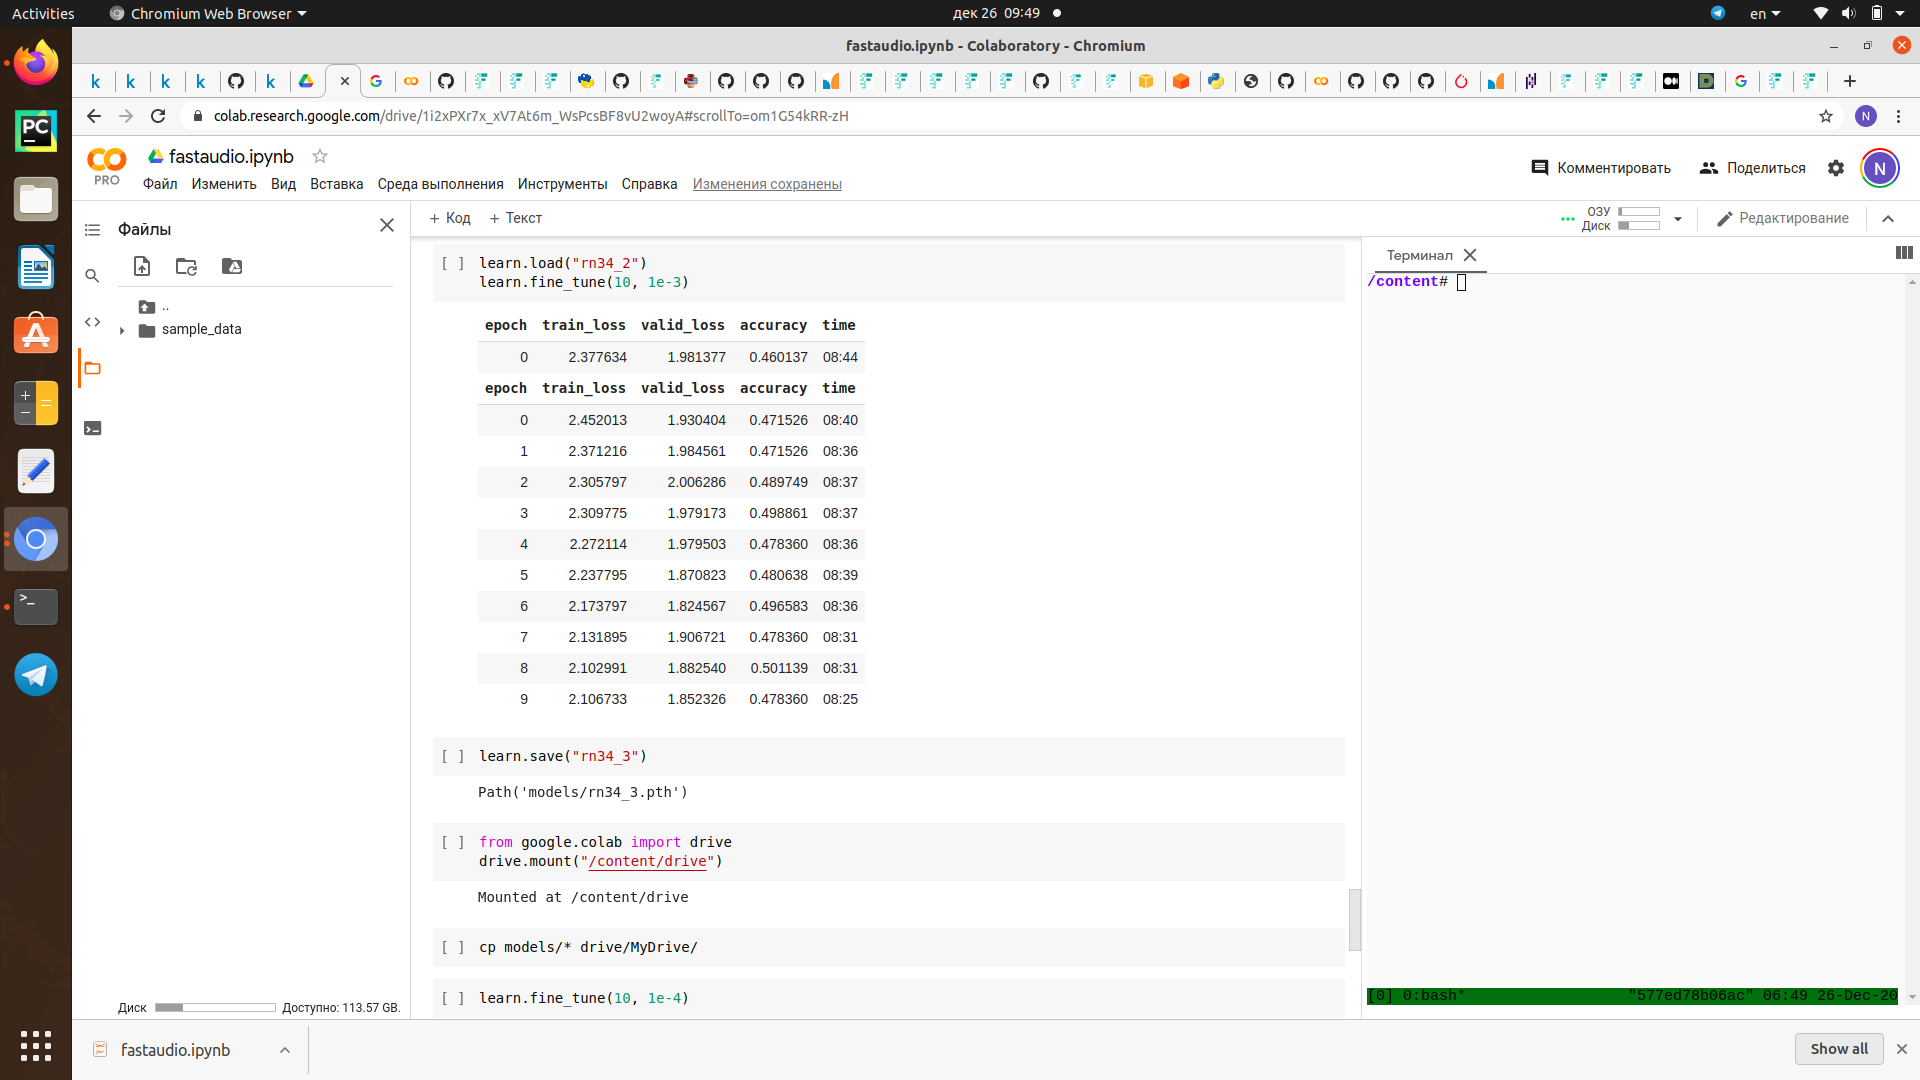

then resnet34 fit_one_cycle 20 1e-3
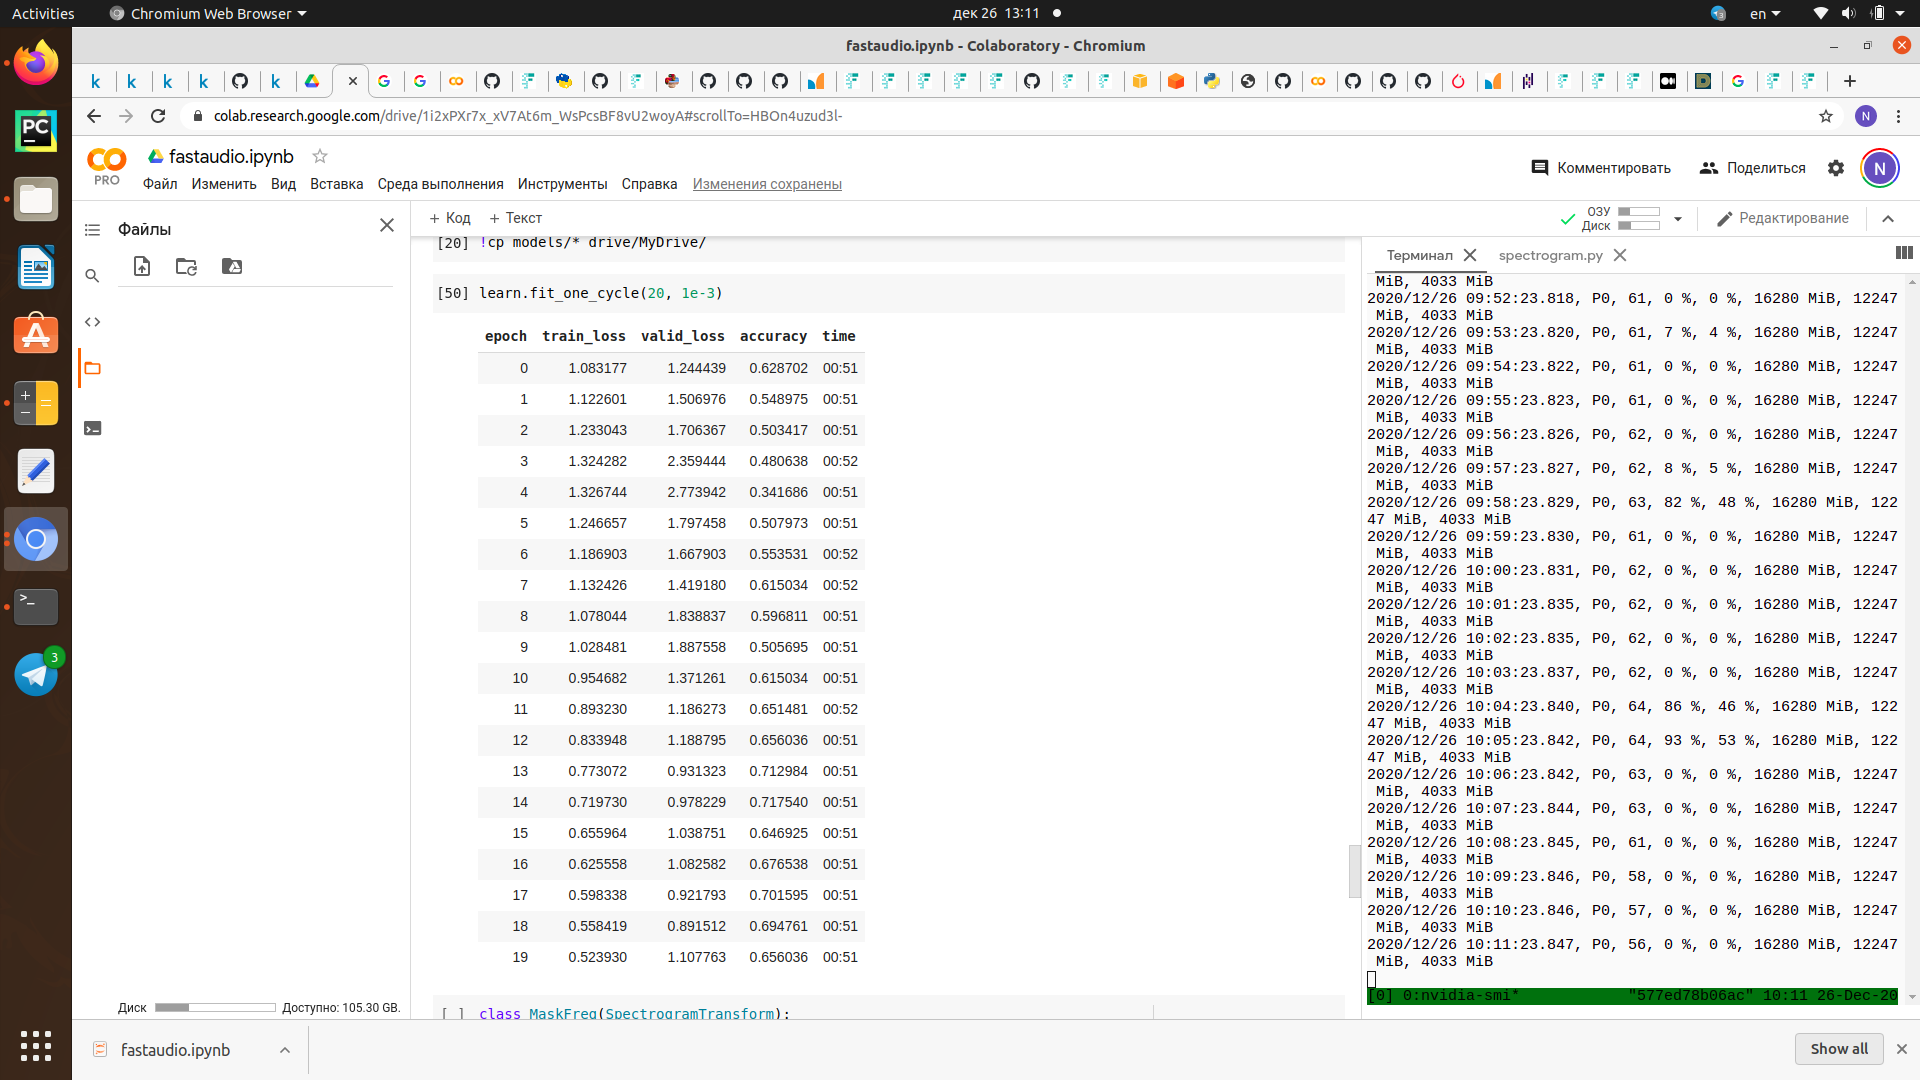

In [ ]:
!git clone https://github.com/DrHB/APTOS-2019-GOLD-MEDAL-SOLUTION.git